UserDetails, CookingSessions, andOrderDetails.

In [1]:
import pandas as pd
# import pandas library

In [3]:
file_path = '/content/Assignment.xlsx'  # Update this to your file path   # Load the Excel file
user_details = pd.read_excel('/content/Assignment.xlsx', sheet_name='UserDetails.csv')
cooking_sessions = pd.read_excel('/content/Assignment.xlsx', sheet_name='CookingSessions.csv')
order_details = pd.read_excel('/content/Assignment.xlsx', sheet_name='OrderDetails.csv')


In [4]:
user_details = user_details.drop_duplicates()   # Data Cleaning   # Remove duplicates
cooking_sessions = cooking_sessions.drop_duplicates()
order_details = order_details.drop_duplicates()

In [5]:
user_details['Registration Date'] = pd.to_datetime(user_details['Registration Date'])   # Convert date columns to datetime
cooking_sessions['Session Start'] = pd.to_datetime(cooking_sessions['Session Start'])
cooking_sessions['Session End'] = pd.to_datetime(cooking_sessions['Session End'])
order_details['Order Date'] = pd.to_datetime(order_details['Order Date'])

In [6]:
order_details['Rating'] = order_details['Rating'].fillna(order_details['Rating'].mean())    #Fill missing values

In [7]:
sessions_orders = pd.merge(cooking_sessions, order_details, on='Session ID', suffixes=('_session', '_order'))   # Merge CookingSessions with OrderDetails using Session ID


In [11]:
sessions_orders.columns = sessions_orders.columns.str.strip()
user_details.columns = user_details.columns.str.strip()

# Check if 'User ID' exists in both DataFrames
print("Sessions Orders Columns:", sessions_orders.columns)
print("User Details Columns:", user_details.columns)

# Perform the merge
#merged_data = pd.merge(sessions_orders, user_details, on='User ID')

Sessions Orders Columns: Index(['Session ID', 'User ID_session', 'Dish Name_session',
       'Meal Type_session', 'Session Start', 'Session End', 'Duration (mins)',
       'Session Rating', 'Order ID', 'User ID_order', 'Order Date',
       'Meal Type_order', 'Dish Name_order', 'Order Status', 'Amount (USD)',
       'Time of Day', 'Rating'],
      dtype='object')
User Details Columns: Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')


In [23]:
sessions_orders.rename(columns={' User ID': 'User ID_session'}, inplace=True)
user_details.rename(columns={' User ID': 'User ID'}, inplace=True)


In [25]:
# Rename the column in the DataFrame
sessions_orders.rename(columns={'User ID_session': 'User ID'}, inplace=True)

# Verify the change
print(sessions_orders.columns)


Index(['Session ID', 'User ID', 'Dish Name_session', 'Meal Type_session',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'Order ID', 'User ID_order', 'Order Date', 'Meal Type_order',
       'Dish Name_order', 'Order Status', 'Amount (USD)', 'Time of Day',
       'Rating'],
      dtype='object')


In [26]:
# Display column names for both DataFrames
print("Columns in sessions_orders:", sessions_orders.columns)
print("Columns in user_details:", user_details.columns)


Columns in sessions_orders: Index(['Session ID', 'User ID', 'Dish Name_session', 'Meal Type_session',
       'Session Start', 'Session End', 'Duration (mins)', 'Session Rating',
       'Order ID', 'User ID_order', 'Order Date', 'Meal Type_order',
       'Dish Name_order', 'Order Status', 'Amount (USD)', 'Time of Day',
       'Rating'],
      dtype='object')
Columns in user_details: Index(['User ID', 'User Name', 'Age', 'Location', 'Registration Date', 'Phone',
       'Email', 'Favorite Meal', 'Total Orders'],
      dtype='object')


In [27]:
sessions_orders['User ID'] = sessions_orders['User ID'].astype(str)
user_details['User ID'] = user_details['User ID'].astype(str)


In [29]:
merged_data = pd.merge(sessions_orders, user_details, on='User ID')   # Merge the result with UserDetails using User ID

In [30]:
popular_dishes = merged_data['Dish Name_order'].value_counts()   # Most popular dishes based on the number of orders
print("Most Popular Dishes:\n", popular_dishes)

Most Popular Dishes:
 Dish Name_order
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


In [31]:
correlation = merged_data[['Session Rating', 'Rating']].corr()            # To analyze correlation between session ratings and order ratings
print("Correlation between session rating and order rating:\n", correlation)

Correlation between session rating and order rating:
                 Session Rating   Rating
Session Rating         1.00000  0.61151
Rating                 0.61151  1.00000


In [32]:
orders_by_location = merged_data['Location'].value_counts()  # Orders by location
print("Orders by Location:\n", orders_by_location)

Orders by Location:
 Location
New York         3
Los Angeles      3
Chicago          3
San Francisco    2
Seattle          2
Austin           1
Boston           1
Miami            1
Name: count, dtype: int64


In [33]:
merged_data['Age Group'] = pd.cut(merged_data['Age'], bins=[18, 30, 40, 50, 60], labels=['18-30', '31-40', '41-50', '51-60'])
orders_by_age_group = merged_data['Age Group'].value_counts()
print("Orders by Age Group:\n", orders_by_age_group)            # Age group analysis

Orders by Age Group:
 Age Group
18-30    8
31-40    5
41-50    3
51-60    0
Name: count, dtype: int64


In [34]:
total_revenue = merged_data['Amount (USD)'].sum()
print("Total Revenue: $", total_revenue)

Total Revenue: $ 180.0


In [35]:
avg_orders_per_user = merged_data.groupby('User ID')['Order ID'].count().mean()
print("Average Orders per User:", avg_orders_per_user)

Average Orders per User: 2.0


In [36]:
import matplotlib.pyplot as plt       #Import Visualization Libraries
import seaborn as sns


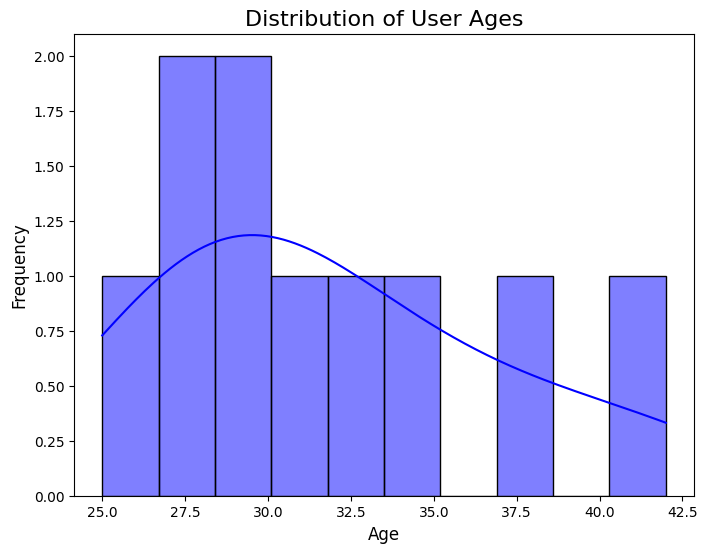

In [37]:
plt.figure(figsize=(8, 6))                          #Distribution of User Age
sns.histplot(user_details['Age'], bins=10, kde=True, color='blue')
plt.title('Distribution of User Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


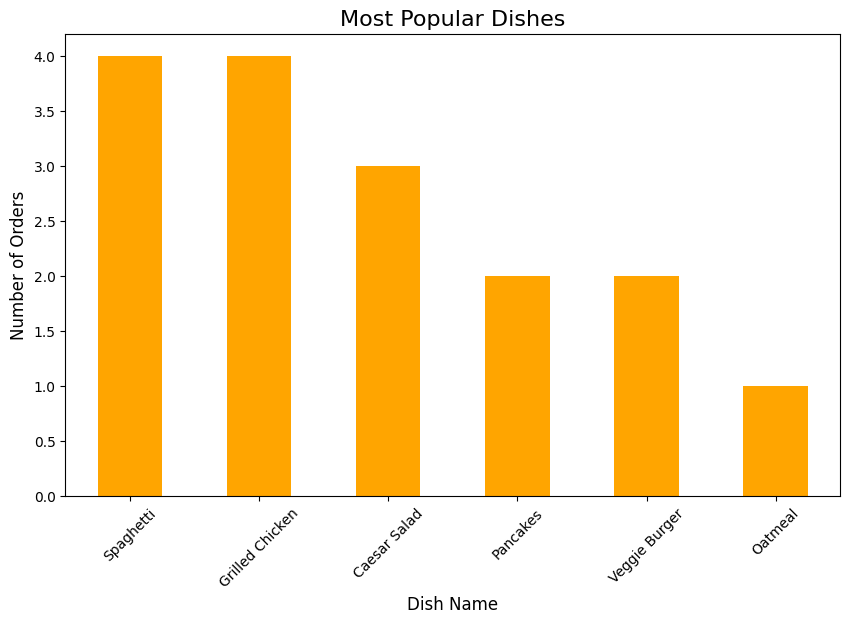

In [39]:
# Count of orders for each dish       Popular Dishes Based on Orders
popular_dishes = sessions_orders['Dish Name_session'].value_counts()

plt.figure(figsize=(10, 6))
popular_dishes.plot(kind='bar', color='orange')
plt.title('Most Popular Dishes', fontsize=16)
plt.xlabel('Dish Name', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.show()


<ipython-input-40-7874e8f33116>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Meal Type', y='Duration (mins)', data=cooking_sessions, palette='Set2')


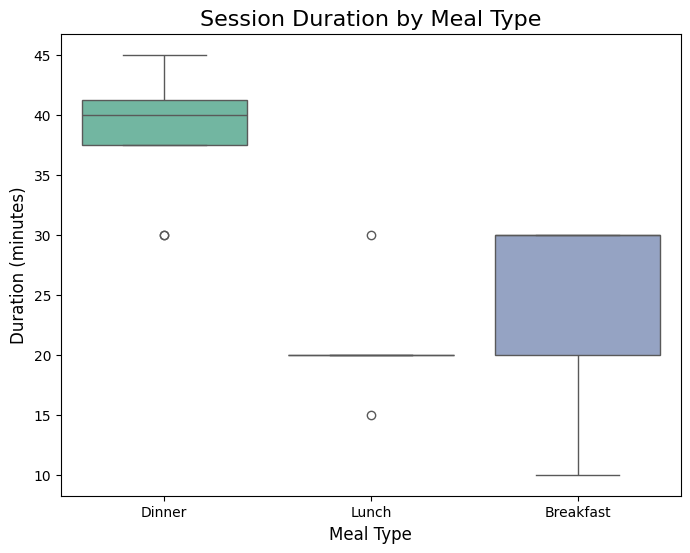

In [40]:
plt.figure(figsize=(8, 6))          #Session Duration by Meal Type
sns.boxplot(x='Meal Type', y='Duration (mins)', data=cooking_sessions, palette='Set2')
plt.title('Session Duration by Meal Type', fontsize=16)
plt.xlabel('Meal Type', fontsize=12)
plt.ylabel('Duration (minutes)', fontsize=12)
plt.show()


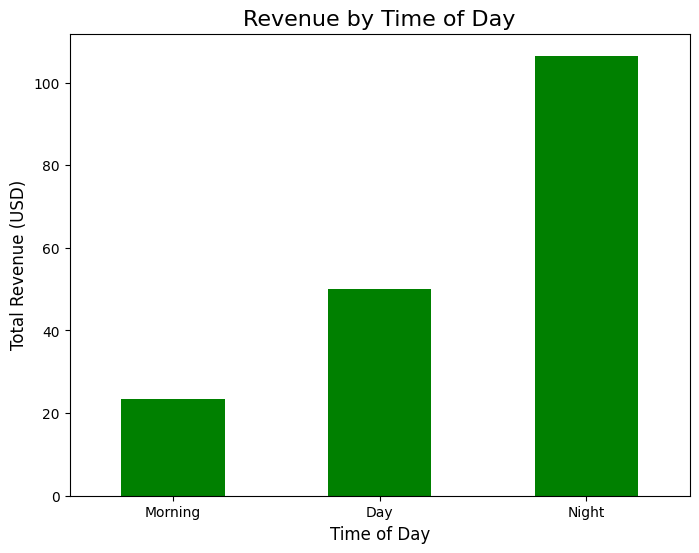

In [41]:
revenue_by_time = order_details.groupby('Time of Day')['Amount (USD)'].sum().sort_values()    #Revenue by Time of Day

plt.figure(figsize=(8, 6))
revenue_by_time.plot(kind='bar', color='green')
plt.title('Revenue by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


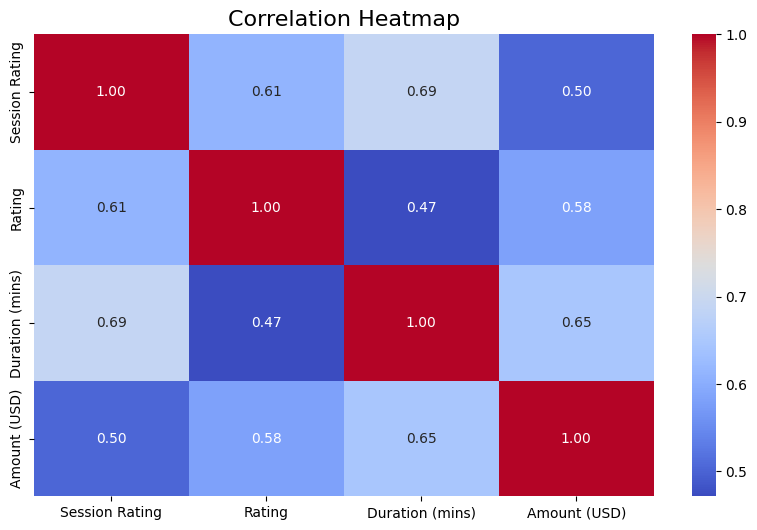

In [42]:
plt.figure(figsize=(10, 6))           #Correlation Heatmap
correlation_matrix = merged_data[['Session Rating', 'Rating', 'Duration (mins)', 'Amount (USD)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


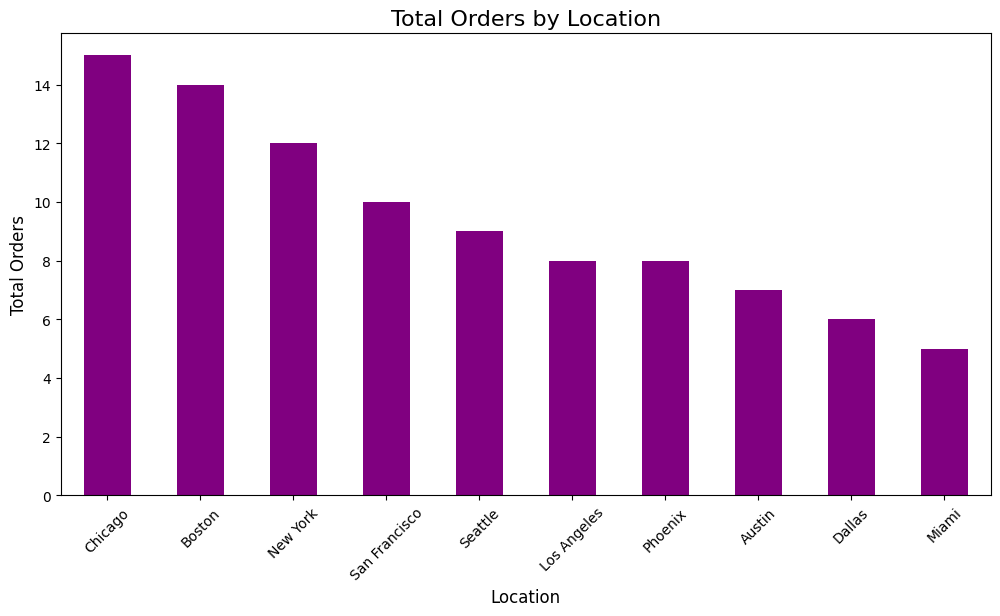

In [43]:
orders_by_location = user_details.groupby('Location')['Total Orders'].sum()     #Orders by Location

plt.figure(figsize=(12, 6))
orders_by_location.sort_values(ascending=False).plot(kind='bar', color='purple')
plt.title('Total Orders by Location', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)
plt.xticks(rotation=45)
plt.show()
